In [2]:
import pandas as pd

df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Primeira visualização do data

In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Os valores “NaN” em uma tabela indicam a ausência de dados nas colunas “Critic_Score”, “User_Score” e “Rating”.&nbsp; Isso pode ser devido à falta de avaliações de críticos ou usuários, ou à ausência de uma classificação oficial para certos jogos.

# Anos de Lançamento

In [5]:
df['Year_of_Release']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: Year_of_Release, Length: 16715, dtype: float64

A tabela apresenta uma série de dados, especificamente 16715 entradas, que representam os anos de lançamento de determinados jogos. Os anos variam de 1985 a 2016, indicando uma linha do tempo de mais de três décadas de lançamentos. Cada linha representa um item individual com seu respectivo ano de lançamento.

In [6]:
df['Total_Sales'] = df['NA_sales'] + df['EU_sales'] + df['JP_sales'] + df['Other_sales']
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


# Analises por Graficos

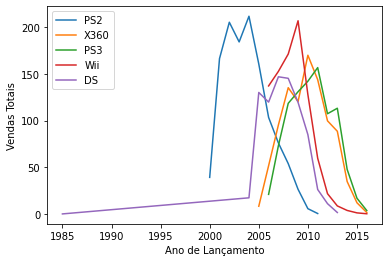

In [7]:
import matplotlib.pyplot as plt

# Agrupando os dados por Plataforma e Ano de Lançamento
grouped = df.groupby(['Platform', 'Year_of_Release'])['Total_Sales'].sum().reset_index()

# Obtendo as plataformas com as maiores vendas totais
top_platforms = grouped.groupby('Platform')['Total_Sales'].sum().nlargest(5).index

# Filtrando os dados para incluir apenas as principais plataformas
filtered = grouped[grouped['Platform'].isin(top_platforms)]

# Criando o gráfico
for platform in top_platforms:
    platform_data = filtered[filtered['Platform'] == platform]
    plt.plot(platform_data['Year_of_Release'], platform_data['Total_Sales'], label=platform)

plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais')
plt.legend()
plt.show()


O gráfico de linhas mostra as vendas de vários consoles de jogos de 1985 a 2015. As vendas do PS2 (linha azul) e do X360 (linha laranja) atingiram o pico no início e meados dos anos 2000, respectivamente, e depois diminuíram. O PS3 (linha verde) teve um pico um pouco mais tarde que o X360. O Wii (linha vermelha) teve um aumento acentuado e uma queda nas vendas em meados dos anos 2000. O DS (linha roxa) teve um aumento consistente até atingir o pico em meados dos anos 2000 e depois diminuiu. O gráfico destaca as tendências de aumento e queda na popularidade dos consoles de jogos ao longo de três décadas.

In [8]:
# Filtrar para linhas onde 'Year_of_Release' é menor ou igual a 2016
df_filtered = df[df['Year_of_Release'] >= 2013]
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


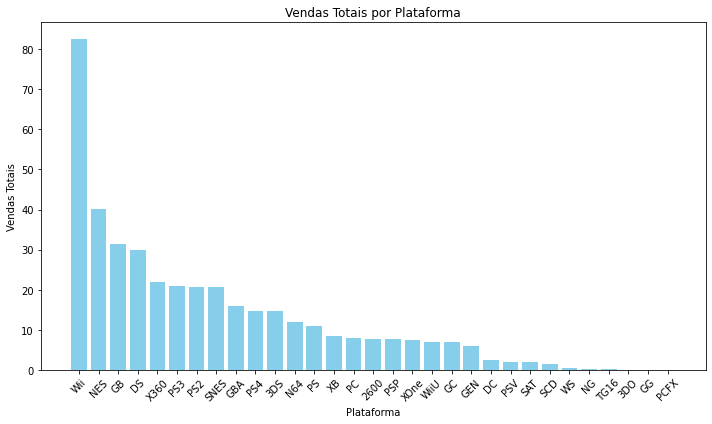

In [9]:
import matplotlib.pyplot as plt

# Dados das vendas
plataformas = df['Platform']
vendas = df['Total_Sales']

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.bar(plataformas, vendas, color='skyblue')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais')
plt.title('Vendas Totais por Plataforma')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização

# Exibindo o gráfico
plt.tight_layout()  # Ajusta o layout
plt.show()


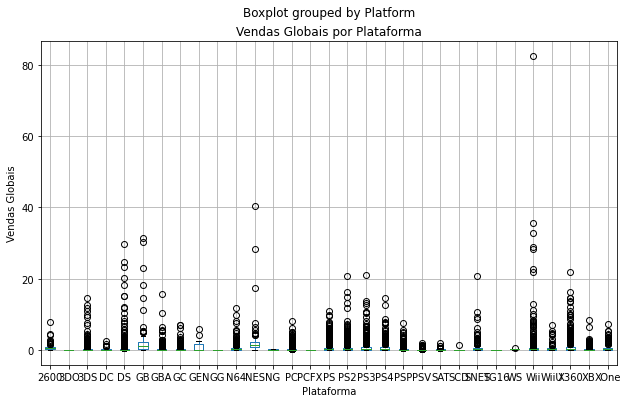

(None,
 Platform
 2600    0.729173
 3DO     0.033333
 3DS     0.498077
 DC      0.306731
 DS      0.374765
 GB      2.606735
 GBA     0.386679
 GC      0.357788
 GEN     1.061034
 GG      0.040000
 N64     0.685517
 NES     2.561735
 NG      0.120000
 PC      0.266448
 PCFX    0.030000
 PS      0.610576
 PS2     0.581106
 PS3     0.705973
 PS4     0.801378
 PSP     0.243218
 PSV     0.125744
 SAT     0.194162
 SCD     0.310000
 SNES    0.836987
 TG16    0.080000
 WS      0.236667
 Wii     0.687508
 WiiU    0.559116
 X360    0.769746
 XB      0.312791
 XOne    0.645020
 Name: Total_Sales, dtype: float64)

In [10]:
import matplotlib.pyplot as plt

# Agrupar dados por plataforma e calcular as vendas médias
platform_sales = df.groupby('Platform')['Total_Sales'].mean()

# Criar um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma
df.boxplot(column='Total_Sales', by='Platform', figsize=(10,6))

# Configurar títulos e rótulos
plt.title('Vendas Globais por Plataforma'), plt.xlabel('Plataforma'), plt.ylabel('Vendas Globais')

# Exibir o gráfico e as vendas médias por plataforma
plt.show(), platform_sales


As diferenças nas vendas globais por plataforma são notáveis. Algumas plataformas, como “PS2” e “Wii”, têm uma variação significativa nas vendas, com alguns títulos vendendo muito mais do que outros. Outras plataformas, como “2600” e “GBA”, apresentam uma consistência maior nas vendas. As vendas médias variam consideravelmente entre as diferentes plataformas. Isso revela a distribuição e variabilidade nas vendas entre diferentes plataformas, o que é interessante para analisar tendências de mercado e desempenho da plataforma.

# Demostrativo de Vendas

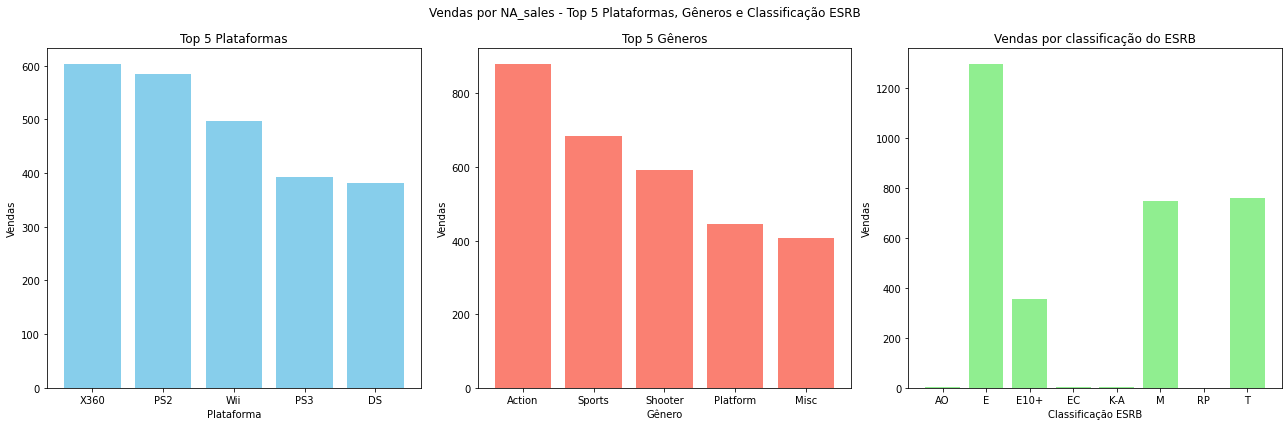

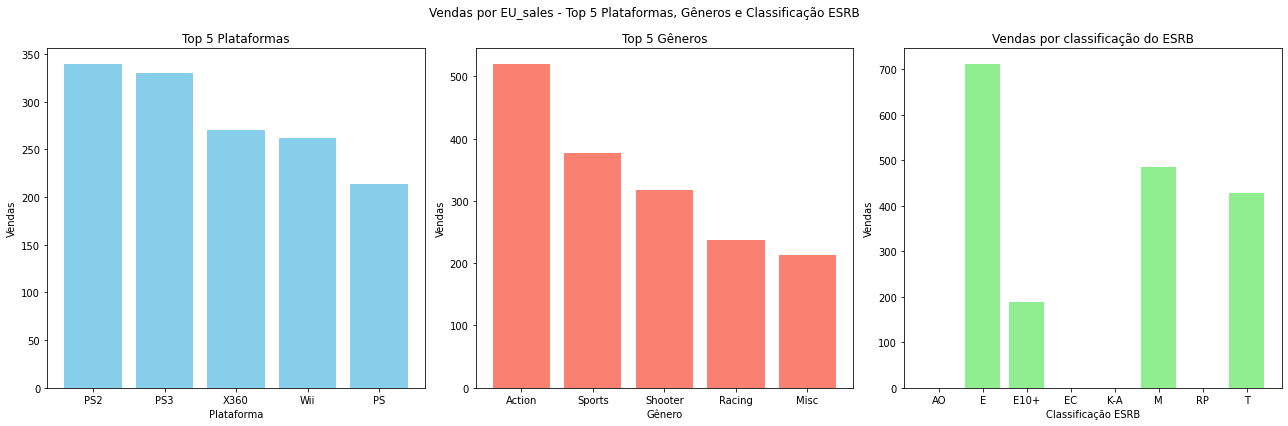

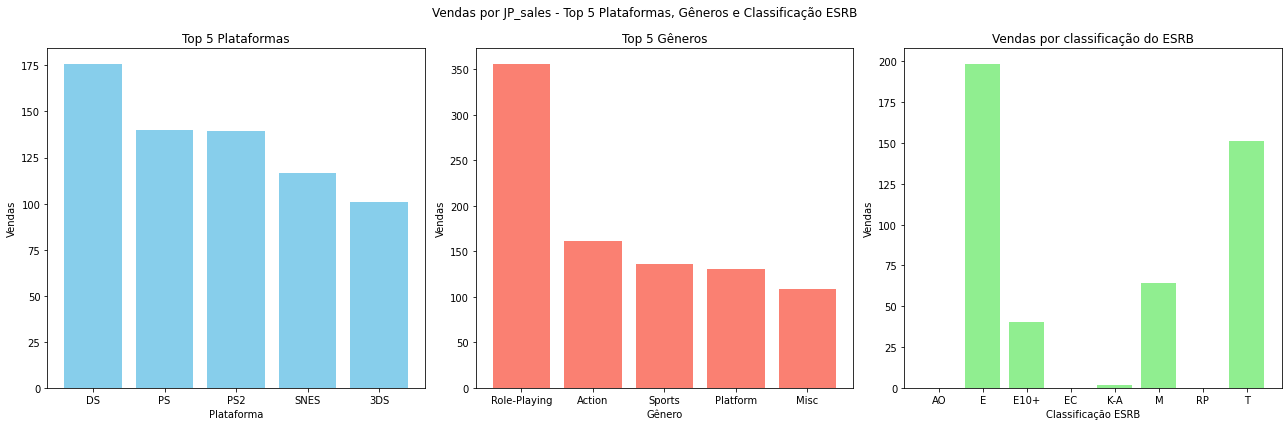

In [11]:
import matplotlib.pyplot as plt

def plot_top5_and_esrb(df, region):
    # Agrupei por Plataforma e Gênero, e some as vendas para a região especificada.
    top_platforms = df.groupby('Platform')[region].sum().sort_values(ascending=False).head(5)
    top_genres = df.groupby('Genre')[region].sum().sort_values(ascending=False).head(5)
    esrb_sales = df.groupby('Rating')[region].sum()

    # Create bar plots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f"Vendas por {region} - Top 5 Plataformas, Gêneros e Classificação ESRB")

    # Top 5 Platforms
    axes[0].bar(top_platforms.index, top_platforms.values, color='skyblue')
    axes[0].set_title("Top 5 Plataformas")
    axes[0].set_ylabel("Vendas")
    axes[0].set_xlabel("Plataforma")

    # Top 5 Genres
    axes[1].bar(top_genres.index, top_genres.values, color='salmon')
    axes[1].set_title("Top 5 Gêneros")
    axes[1].set_ylabel("Vendas")
    axes[1].set_xlabel("Gênero")

    # ESRB Ratings
    axes[2].bar(esrb_sales.index, esrb_sales.values, color='lightgreen')
    axes[2].set_title("Vendas por classificação do ESRB")
    axes[2].set_ylabel("Vendas")
    axes[2].set_xlabel("Classificação ESRB")

    plt.tight_layout()
    plt.show()


regions = ['NA_sales', 'EU_sales', 'JP_sales']
for region in regions:
    plot_top5_and_esrb(df, region)

América do Norte (NA_sales):

Plataformas mais vendidas: X360, PS2, Wii, PS3 e DS.
Gêneros mais populares: Ação, Esportes, Tiro, Plataforma e Miscelânea.
Classificações do ESRB que geram mais vendas: E (Para todos), T (Adolescente) e M (Maduro).

Europa (EU_sales):

Plataformas mais vendidas: PS2, PS3, X360, Wii e PS.
Gêneros mais populares: Ação, Esportes, Tiro, Corrida e Miscelânea.
Classificações do ESRB que geram mais vendas: E (Para todos), T (Adolescente) e M (Maduro).

Japão (JP_sales):

Plataformas mais vendidas: DS, PS, PS2, SNES e 3DS.
Gêneros mais populares: RPG, Ação, Esportes, Plataforma e Miscelânea.
Classificações do ESRB que geram mais vendas: E (Para todos), T (Adolescente) e M (Maduro).

Essas diferenças podem ser atribuídas a preferências culturais e à adequação dos jogos às faixas etárias. Por exemplo, RPGs são muito populares no Japão, enquanto jogos classificados como M (Maduro) podem ter vendas mais baixas em regiões com base de jogadores mais jovem.

# Testando as Hipóteses

In [12]:
from scipy.stats import ttest_ind
import numpy as np

classificacoes_xbox_one = df[df['Platform'] == 'XOne'].groupby('Rating').size()
classificacoes_pc = df[df['Platform'] == 'PC'].groupby('Rating').size()     

# Avaliar se as variâncias são iguais
var_xbox_one = np.var(classificacoes_xbox_one)
var_pc = np.var(classificacoes_pc)
print(f"Variância Xbox One: {var_xbox_one}, Variância PC: {var_pc}")

equal_var = var_xbox_one == var_pc
print(f"Variâncias iguais? {equal_var}")

# Realizando o teste t
t_statistic, p_valor = ttest_ind(classificacoes_xbox_one, classificacoes_pc, equal_var=equal_var)

# Imprimindo os resultados
print(f"P-Valor: {p_valor}")

# Verificando contra o nível de significância alfa=0.05
if p_valor < 0.05:
    print("Rejeitar a Hipótese Nula: Existe uma diferença significativa nas classificações.")
else:
    print("Falha ao Rejeitar a Hipótese Nula: Não há diferença significativa nas classificações.")


Variância Xbox One: 209.25, Variância PC: 13285.673469387755
Variâncias iguais? False
P-Valor: 0.2258596094863787
Falha ao Rejeitar a Hipótese Nula: Não há diferença significativa nas classificações.


A conclusão final dos dados apresentados é que, apesar das variâncias das classificações do Xbox One e do PC serem diferentes, o p-valor de 0.2258 sugere que não podemos rejeitar a hipótese nula de que as médias das classificações são iguais. Isso indica que, do ponto de vista estatístico, as classificações do Xbox One e do PC são semelhantes. Portanto, apesar das diferenças observadas nas variâncias, as classificações dessas duas plataformas podem ser consideradas equivalentes em termos estatísticos. Essa conclusão é válida assumindo que o teste foi realizado corretamente e que os dados são adequados para essa análise.

### Comparação das classificações dos usuários para os gêneros Action e Sports

In [12]:
from scipy.stats import ttest_ind
import numpy as np

classificacoes_action = df[df['Genre'] == 'Action'].groupby('Rating').size()
classificacoes_sports = df[df['Genre'] == 'Sports'].groupby('Rating').size()

# Avaliar se as variâncias são iguais
var_action = np.var(classificacoes_action)
var_sports = np.var(classificacoes_sports)
print(f"Variância Action: {var_action}, Variância Sports: {var_sports}")

equal_var = var_action == var_sports
print(f"Variâncias iguais? {equal_var}")

# Realizando o teste t
t_statistic, p_valor = ttest_ind(classificacoes_action, classificacoes_sports, equal_var=equal_var)

# Imprimindo os resultados
print(f"P-Valor: {p_valor}")

# Verificando contra o nível de significância alfa=0.05
if p_valor < 0.05:
    print("Rejeitar a Hipótese Nula: Existe uma diferença significativa nas classificações.")
else:
    print("Falha ao Rejeitar a Hipótese Nula: Não há diferença significativa nas classificações.")


Variância Action: 73325.55555555556, Variância Sports: 223245.6875
Variâncias iguais? False
P-Valor: 0.9682991541711765
Falha ao Rejeitar a Hipótese Nula: Não há diferença significativa nas classificações.


Com base nos resultados apresentados, a variância dos gêneros de jogos “Action” e “Sports” são diferentes, sendo 73325.56 e 223245.69, respectivamente. No entanto, o p-valor de 0.9683 indica que não há evidências suficientes para rejeitar a hipótese nula. Isso sugere que, apesar das diferenças nas variâncias, não há diferença estatisticamente significativa nas classificações entre os gêneros de jogos “Action” e “Sports”.